### Phishing Website Detection Using Deep Learning

The implemented solution leverages deep learning techniques for the robust detection of phishing websites, addressing the critical challenge of online security. The code begins with data loading and preprocessing, using the pandas library to handle the dataset ('dataset_phishing.csv'). This dataset's structure is explored, revealing key features like 'url' and the target variable 'status.' The target variable is encoded using LabelEncoder and one-hot encoding for effective model training.

Moving on to model architecture, a sequential neural network is constructed using the Keras library. It incorporates layers such as Embedding, LSTM, GRU, Dropout, and Dense, forming a sophisticated architecture capable of capturing sequential patterns and preventing overfitting. The model is compiled with categorical cross-entropy loss and the Adam optimizer before undergoing training on the prepared dataset.

Also, the script demonstrates the training and evaluation of a Decision Tree classifier on a binary classification problem, providing both numerical and visual insights into the model's performance and the dataset's characteristics.

Model evaluation is performed using the test set, generating a confusion matrix for a visual representation of the model's performance. Additionally, a correlation matrix heatmap is created to unveil underlying relationships among numeric features in the dataset. The distribution of the target variable ('status') is depicted through a count plot, offering insights into the dataset's class distribution.

The documentation highlights the visualizations' importance in understanding the dataset and model performance. A classification report is printed to provide a comprehensive overview of the model's accuracy, precision, recall, and F1 score. To enhance user interaction, the model accepts website URLs as input, enabling real-time predictions and making it a practical tool for assessing potential phishing risks. This holistic approach to phishing detection, blending deep learning with traditional data visualization techniques, creates a robust and informative solution for online security.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset_phishing.csv')
target_column = 'status'
df.head()

url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               19   0        3           0      0      0       0      0  ...   
1               23   1        1           0      0      0       0      0  ...   
2               50   1        4           1      0      1       2      0  ...   
3               11   0        2           0      0      0       0      0  ...   
4               15   0        2           2      0      0       0      0  ...   

   domain_in_title  domain_with_copyright  whois_registered_domain  \
0                0                      1                        0   
1                1                      0                        0   
2                1                      0                        0   
3                1                      0                        0   
4                0                      1                        0   

   domain_registration_length  domain_age  web_traffic  dns_record  \
0                          45          -1            0           1   
1                          77        5767            0           0   
2                          14        4004      5828815           0   
3                          62          -1       107721           0   
4                         224        8175         8725           0   

   google_index  page_rank      status  
0             1          4  legitimate  
1             1          2    phishing  
2             1          0    phishing  
3             0          3  legitimate  
4             0          6  legitimate  

[5 rows x 89 columns]

In [ ]:
df.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [ ]:
df.isnull().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

In [ ]:
# Data preprocessing
X = df['url']
y = df[target_column]

In [ ]:
# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_one_hot = to_categorical(y_encoded)

Here we are tokenizing and padding sequences of text data

In [ ]:
# Tokenize and pad sequences
max_words = 1000
max_len = 50
tokenizer = Tokenizer(num_words=max_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=max_len)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_one_hot, test_size=0.2, random_state=42)

### Sequential neural network
This model architecture is a combination of embedding and recurrent layers, with the final dense layer providing probabilities for binary classification.

The use of both LSTM and GRU layers allows the model to capture long-range dependencies in sequential data.

In [ ]:
# Model architecture
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))
model.add(LSTM(64, return_sequences=True))
model.add(GRU(32, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(16))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'mse'])

In [ ]:
# Model training
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=2)

Epoch 1/10
286/286 - 38s - loss: 0.4024 - accuracy: 0.8050 - mse: 0.1306 - val_loss: 0.2599 - val_accuracy: 0.8924 - val_mse: 0.0792 - 38s/epoch - 131ms/step
Epoch 2/10
286/286 - 26s - loss: 0.2271 - accuracy: 0.9058 - mse: 0.0681 - val_loss: 0.2548 - val_accuracy: 0.9020 - val_mse: 0.0756 - 26s/epoch - 91ms/step
Epoch 3/10
286/286 - 24s - loss: 0.2088 - accuracy: 0.9182 - mse: 0.0616 - val_loss: 0.2385 - val_accuracy: 0.9046 - val_mse: 0.0727 - 24s/epoch - 84ms/step
Epoch 4/10
286/286 - 26s - loss: 0.1984 - accuracy: 0.9227 - mse: 0.0585 - val_loss: 0.2405 - val_accuracy: 0.9020 - val_mse: 0.0734 - 26s/epoch - 91ms/step
Epoch 5/10
286/286 - 26s - loss: 0.1919 - accuracy: 0.9241 - mse: 0.0571 - val_loss: 0.2403 - val_accuracy: 0.9099 - val_mse: 0.0720 - 26s/epoch - 91ms/step
Epoch 6/10
286/286 - 25s - loss: 0.1849 - accuracy: 0.9262 - mse: 0.0550 - val_loss: 0.2519 - val_accuracy: 0.9068 - val_mse: 0.0738 - 25s/epoch - 88ms/step
Epoch 7/10
286/286 - 25s - loss: 0.1819 - accuracy: 0.927

In [ ]:
# Model evaluation
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)

72/72 [==============================] - 3s 20ms/step


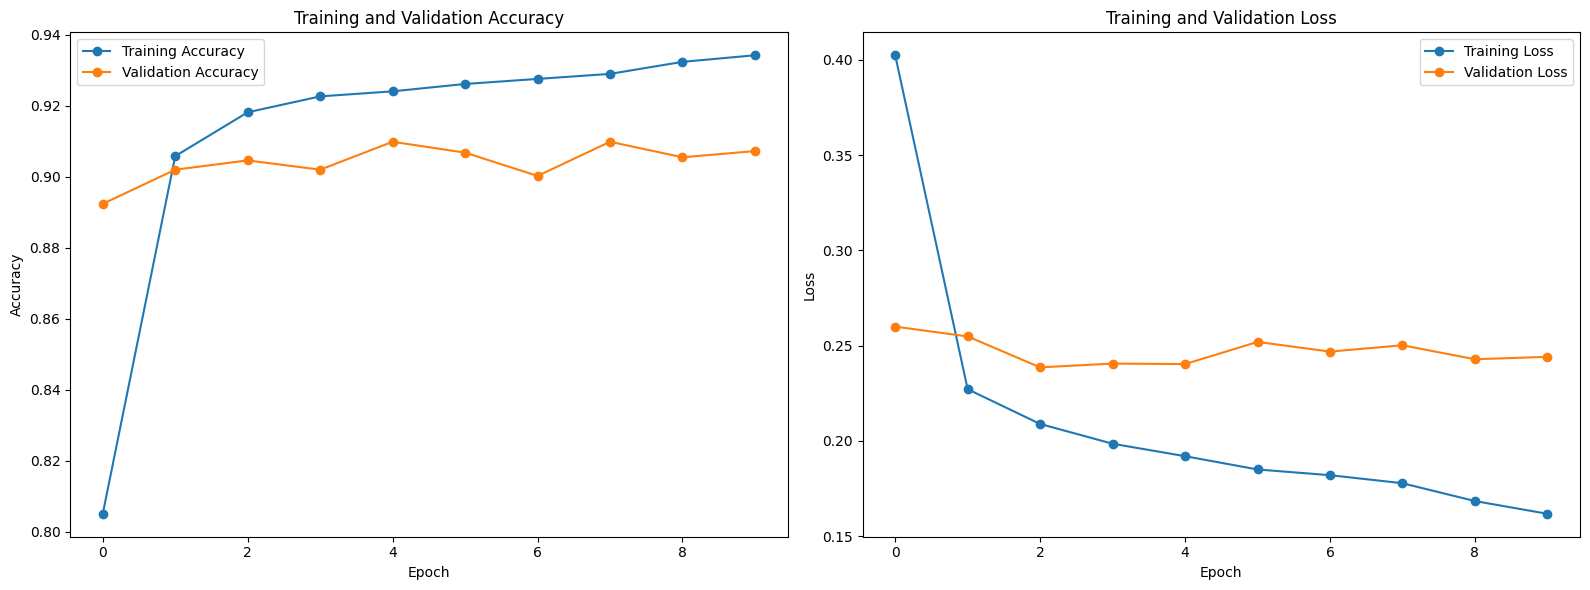

In [ ]:
# Additional Visualization: Training and Validation Accuracy/Loss Trends
plt.figure(figsize=(16, 6))

# Plot Training Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

The confusion matrix is a table that is often used to describe the performance of a classification model on a set of data for which the true values are known. It provides a summary of the correct and incorrect predictions made by the classification model.

[[True Negative   False Positive]

 [False Negative  True Positive]]


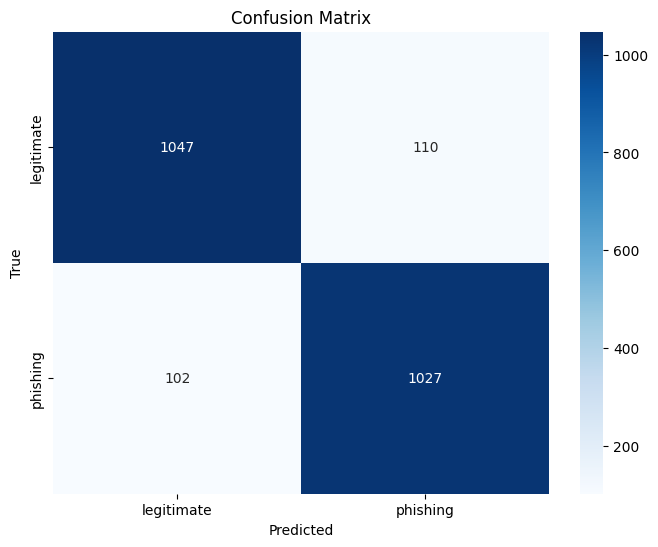

In [ ]:
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

 It helps you understand the balance or imbalance between the classes, which is crucial information for classification tasks. If one class dominates the dataset, it could impact the performance and interpretation of your machine learning model

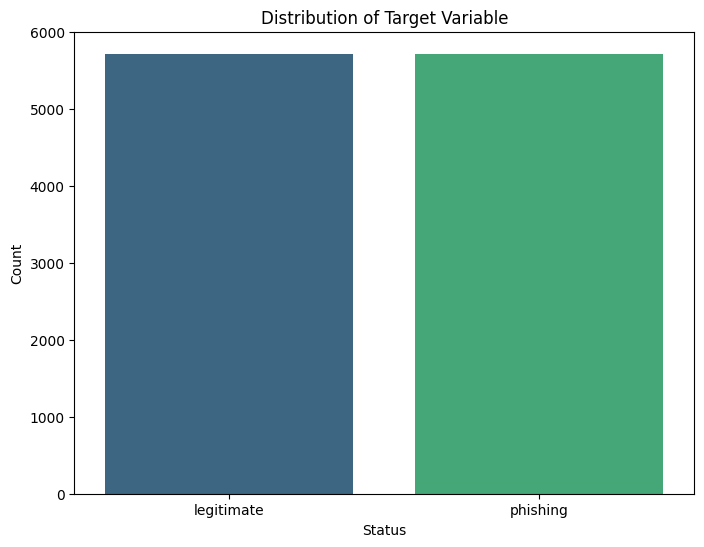

In [ ]:
# Bar chart for target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='status', data=df, palette='viridis')
plt.title('Distribution of Target Variable')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

<ipython-input-89-d5b650b751cf>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,cmap='viridis')


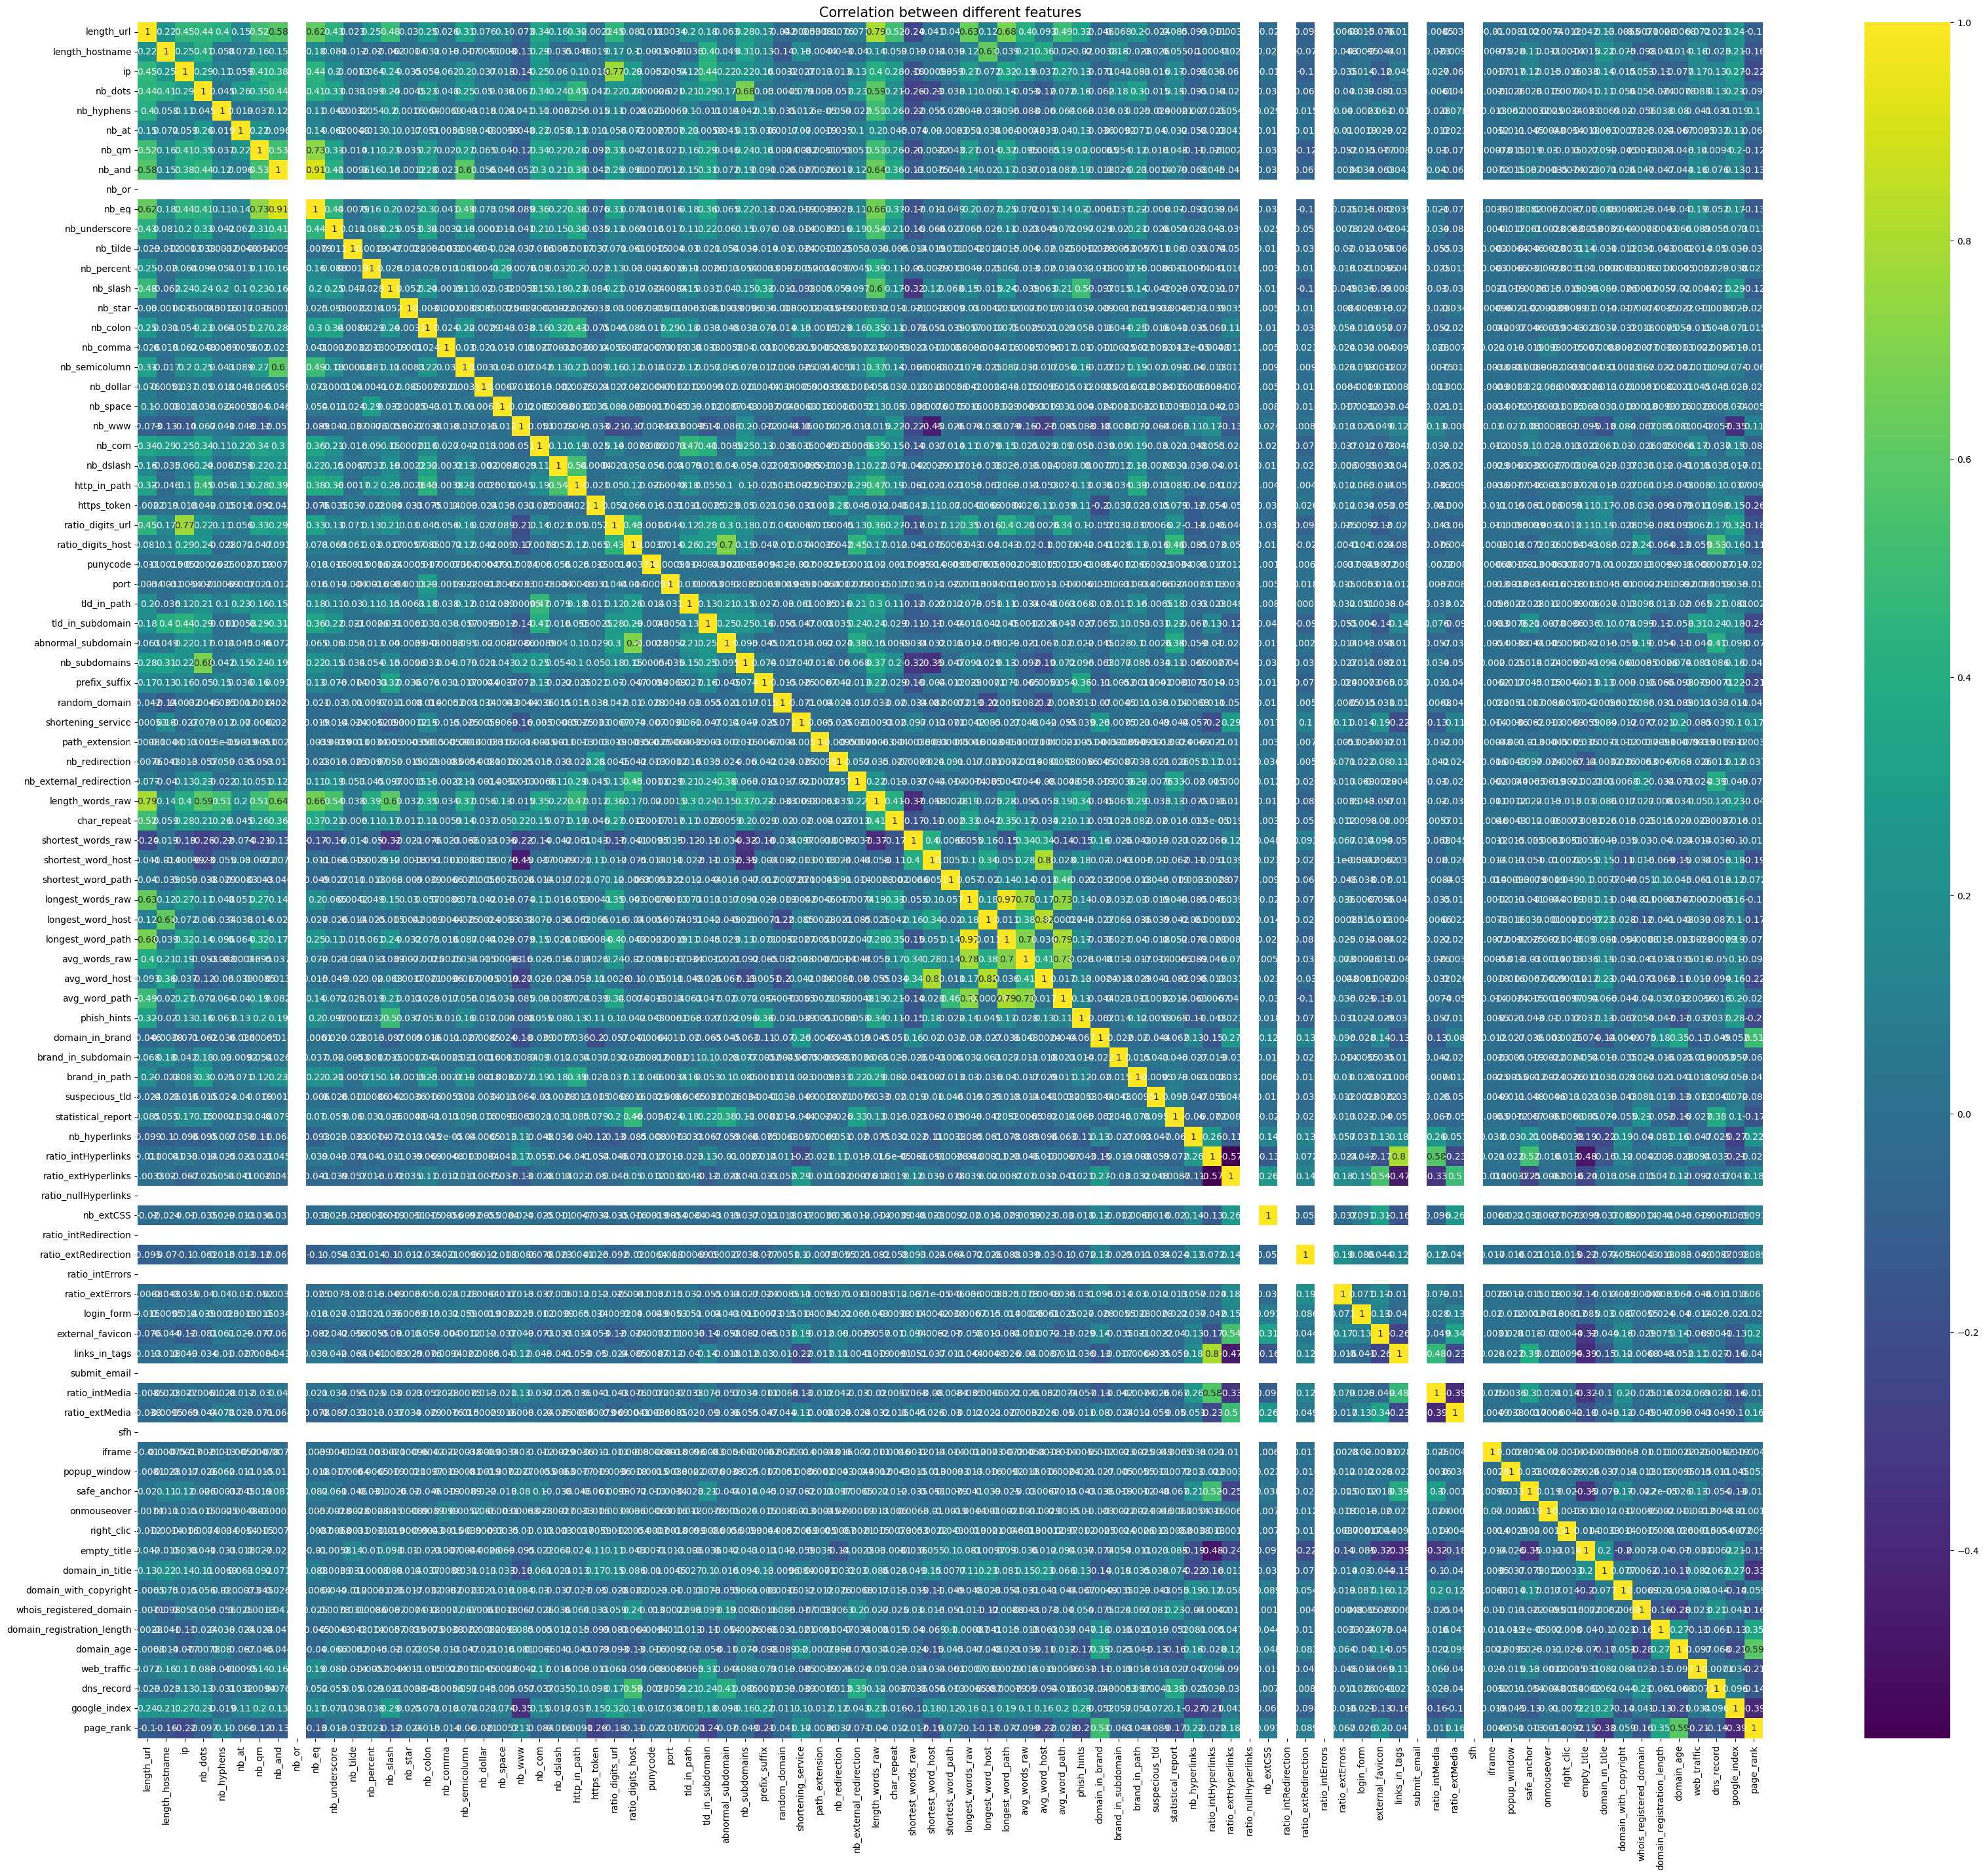

In [ ]:
# Create a heatmap
fig, ax = plt.subplots(1, 1, figsize=(40, 34))
sns.heatmap(df.corr(), annot=True,cmap='viridis')
plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

In [ ]:
# Model evaluation
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Classification report
print(classification_report(np.argmax(y_test, axis=1), y_pred_classes))

# Model evaluation and accuracy
evaluation_result = model.evaluate(X_test, y_test, verbose=0)
accuracy = evaluation_result[1]
# Extracting accuracy from the returned list
print(f"Accuracy: {accuracy:.4f}")

72/72 [==============================] - 2s 25ms/step
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1157
           1       0.90      0.91      0.91      1129

    accuracy                           0.91      2286
   macro avg       0.91      0.91      0.91      2286
weighted avg       0.91      0.91      0.91      2286

Accuracy: 0.9073


# Decision Tree model

In [ ]:
X = df.drop(['url', 'status'], axis=1)
y = df['status']

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
# Decision Tree Model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predictions
y_pred = decision_tree_model.predict(X_test)

In [ ]:
# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred)

In [ ]:
# Classification Report
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1157
           1       0.93      0.94      0.93      1129

    accuracy                           0.94      2286
   macro avg       0.94      0.94      0.94      2286
weighted avg       0.94      0.94      0.94      2286



In [ ]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")

Decision Tree Accuracy: 0.9357


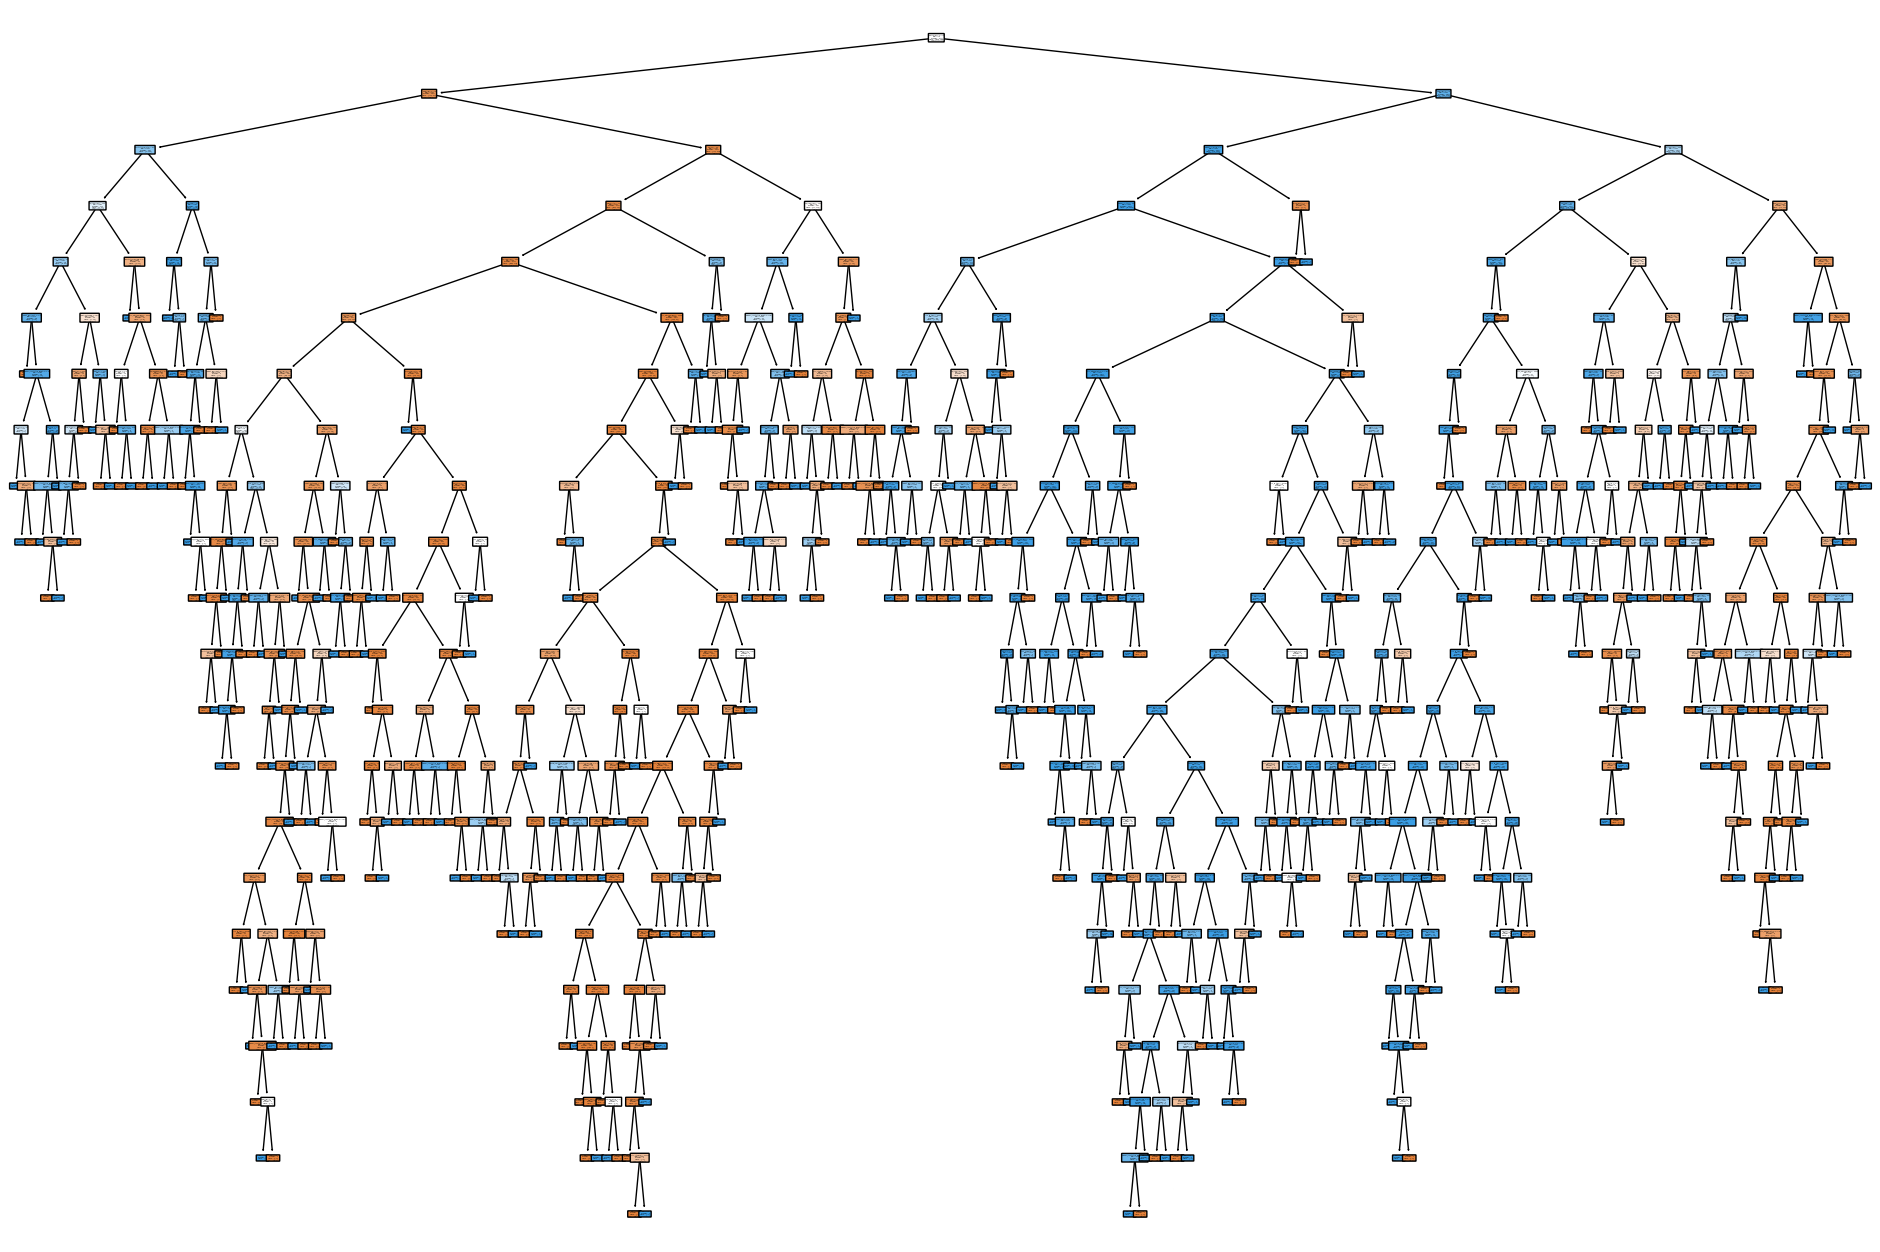

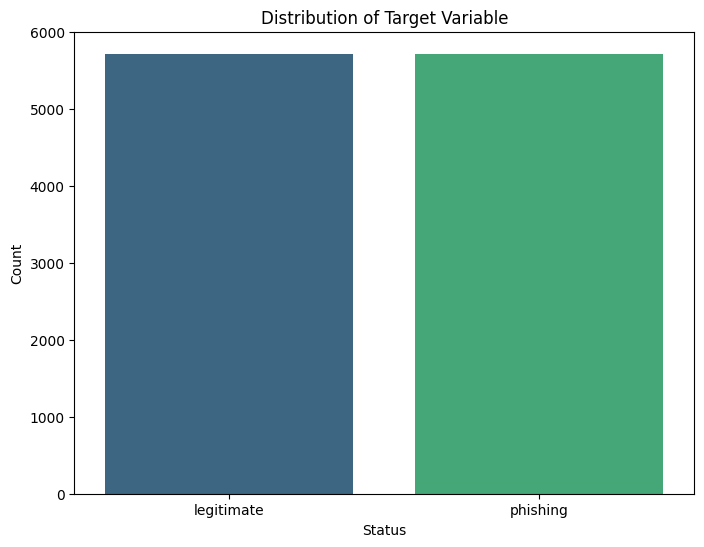

In [ ]:
# Decision Tree Visualization
plt.figure(figsize=(24, 16))
tree.plot_tree(decision_tree_model, feature_names=X.columns, class_names=label_encoder.classes_, filled=True, rounded=True)
plt.show()

# Bar chart for target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='status', data=df, palette='viridis')
plt.title('Distribution of Target Variable')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

In [ ]:
# User input for prediction
user_input = input("Enter a website URL: ")
user_input_seq = tokenizer.texts_to_sequences([user_input])
user_input_pad = pad_sequences(user_input_seq, maxlen=max_len)

Enter a website URL: https://netflix-clone-8e306.web.app/


In [ ]:
# Make prediction
prediction = model.predict(user_input_pad)
predicted_class = label_encoder.classes_[np.argmax(prediction)]
print(f"The model predicts the website as: {predicted_class}")

1/1 [==============================] - 0s 32ms/step
The model predicts the website as: phishing
